In [1]:
#Data visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
data = pd.read_csv('/content/drive/MyDrive/DL study/Hate_Crimes_2017-2025.csv')
data.head()

,Month,Incident Number,Date of Incident,Day of Week,Number of Victims under 18,Number of Victims over 18,Number of Offenders under 18,Number of Offenders over 18,Race/Ethnicity of Offenders,Offense(s),Offense Location,Bias,Zip Code,APD Sector,Council District
0,Jan,2017-241137,01/01/2017 12:00:00 AM,Sun,0,1,0,1,White/Not Hispanic,Aggravated Assault,Park/Playground,Anti-Black or African American,78704.0,Henry,9.0
1,Feb,2017-580344,02/01/2017 12:00:00 AM,Wed,0,1,0,1,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,78702.0,Charlie,1.0
2,Mar,2017-800291,03/21/2017 12:00:00 AM,Tue,0,0,0,0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,78757.0,Ida,7.0
3,Apr,2017-1021534,04/12/2017 12:00:00 AM,Wed,0,0,0,0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish,78723.0,Ida,1.0
4,May,2017-1351550,05/15/2017 12:00:00 AM,Mon,1,0,1,2,White/Not Hispanic,Simple Assault,Residence/Home,Anti-Gay (Male),78750.0,Adam,6.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         266 non-null    object 
 1   Incident Number               266 non-null    object 
 2   Date of Incident              266 non-null    object 
 3   Day of Week                   266 non-null    object 
 4   Number of Victims under 18    266 non-null    object 
 5   Number of Victims over 18     266 non-null    object 
 6   Number of Offenders under 18  266 non-null    object 
 7   Number of Offenders over 18   264 non-null    object 
 8   Race/Ethnicity of Offenders   266 non-null    object 
 9   Offense(s)                    266 non-null    object 
 10  Offense Location              266 non-null    object 
 11  Bias                          266 non-null    object 
 12  Zip Code                      265 non-null    float64
 13  APD S

In [4]:
# Convert 'Date of Incident' to datetime objects
data['Date of Incident'] = pd.to_datetime(data['Date of Incident'])

# Extract date and time into separate columns
data['Date'] = data['Date of Incident'].dt.date
data['Time'] = data['Date of Incident'].dt.time


<ipython-input-4-18fee416e9ee>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date of Incident'] = pd.to_datetime(data['Date of Incident'])


In [5]:
data.head()

,Month,Incident Number,Date of Incident,Day of Week,Number of Victims under 18,Number of Victims over 18,Number of Offenders under 18,Number of Offenders over 18,Race/Ethnicity of Offenders,Offense(s),Offense Location,Bias,Zip Code,APD Sector,Council District,Date,Time
0,Jan,2017-241137,2017-01-01,Sun,0,1,0,1,White/Not Hispanic,Aggravated Assault,Park/Playground,Anti-Black or African American,78704.0,Henry,9.0,2017-01-01,00:00:00
1,Feb,2017-580344,2017-02-01,Wed,0,1,0,1,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,78702.0,Charlie,1.0,2017-02-01,00:00:00
2,Mar,2017-800291,2017-03-21,Tue,0,0,0,0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,78757.0,Ida,7.0,2017-03-21,00:00:00
3,Apr,2017-1021534,2017-04-12,Wed,0,0,0,0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish,78723.0,Ida,1.0,2017-04-12,00:00:00
4,May,2017-1351550,2017-05-15,Mon,1,0,1,2,White/Not Hispanic,Simple Assault,Residence/Home,Anti-Gay (Male),78750.0,Adam,6.0,2017-05-15,00:00:00


In [6]:
data = data.drop('Date of Incident', axis = 1)

In [7]:
data.head()

,Month,Incident Number,Day of Week,Number of Victims under 18,Number of Victims over 18,Number of Offenders under 18,Number of Offenders over 18,Race/Ethnicity of Offenders,Offense(s),Offense Location,Bias,Zip Code,APD Sector,Council District,Date,Time
0,Jan,2017-241137,Sun,0,1,0,1,White/Not Hispanic,Aggravated Assault,Park/Playground,Anti-Black or African American,78704.0,Henry,9.0,2017-01-01,00:00:00
1,Feb,2017-580344,Wed,0,1,0,1,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,78702.0,Charlie,1.0,2017-02-01,00:00:00
2,Mar,2017-800291,Tue,0,0,0,0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,78757.0,Ida,7.0,2017-03-21,00:00:00
3,Apr,2017-1021534,Wed,0,0,0,0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish,78723.0,Ida,1.0,2017-04-12,00:00:00
4,May,2017-1351550,Mon,1,0,1,2,White/Not Hispanic,Simple Assault,Residence/Home,Anti-Gay (Male),78750.0,Adam,6.0,2017-05-15,00:00:00


In [8]:
# Extract year from the 'Date' column
data['Year'] = pd.DatetimeIndex(data['Date']).year
data.head()

,Month,Incident Number,Day of Week,Number of Victims under 18,Number of Victims over 18,Number of Offenders under 18,Number of Offenders over 18,Race/Ethnicity of Offenders,Offense(s),Offense Location,Bias,Zip Code,APD Sector,Council District,Date,Time,Year
0,Jan,2017-241137,Sun,0,1,0,1,White/Not Hispanic,Aggravated Assault,Park/Playground,Anti-Black or African American,78704.0,Henry,9.0,2017-01-01,00:00:00,2017
1,Feb,2017-580344,Wed,0,1,0,1,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,78702.0,Charlie,1.0,2017-02-01,00:00:00,2017
2,Mar,2017-800291,Tue,0,0,0,0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,78757.0,Ida,7.0,2017-03-21,00:00:00,2017
3,Apr,2017-1021534,Wed,0,0,0,0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish,78723.0,Ida,1.0,2017-04-12,00:00:00,2017
4,May,2017-1351550,Mon,1,0,1,2,White/Not Hispanic,Simple Assault,Residence/Home,Anti-Gay (Male),78750.0,Adam,6.0,2017-05-15,00:00:00,2017


## Visual Data Analysis

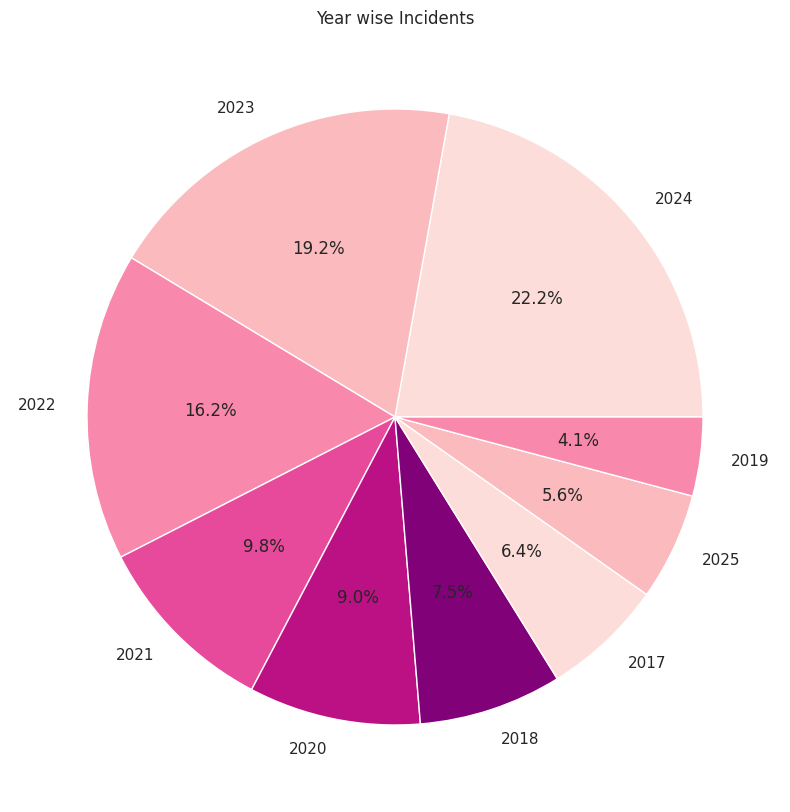

In [138]:
#let's see which year has been most incident prone
values = data['Year'].value_counts()
label = data['Year'].value_counts().index

#Plot graph
plt.figure(figsize = (10, 10))
plt.pie(values, labels = label, autopct = '%1.1f%%', colors = sns.color_palette('RdPu'))
plt.title('Year wise Incidents')
plt.show()

So we get to know from the chart above, year 2024 was the year when maximum number of crimes took place.

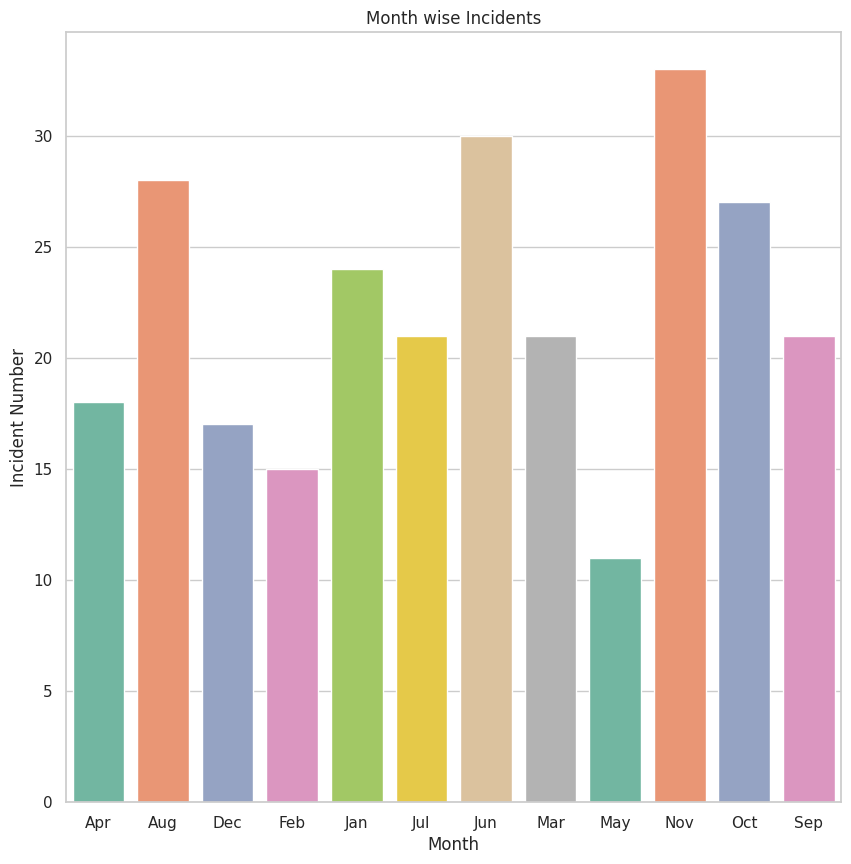

Most Unsafe month is: Nov


In [139]:
#Defining data
incidents = data.groupby('Month')['Incident Number'].count().reset_index()

#Plotting graph
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Month', y = 'Incident Number', data = incidents, hue = incidents['Month'], palette = 'Set2')
plt.title('Month wise Incidents')
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.show()

#Month with maximum incidents
max_incidents_month = incidents.loc[incidents['Incident Number'].idxmax(), 'Month']
print(f"Most Unsafe month is: {max_incidents_month}")

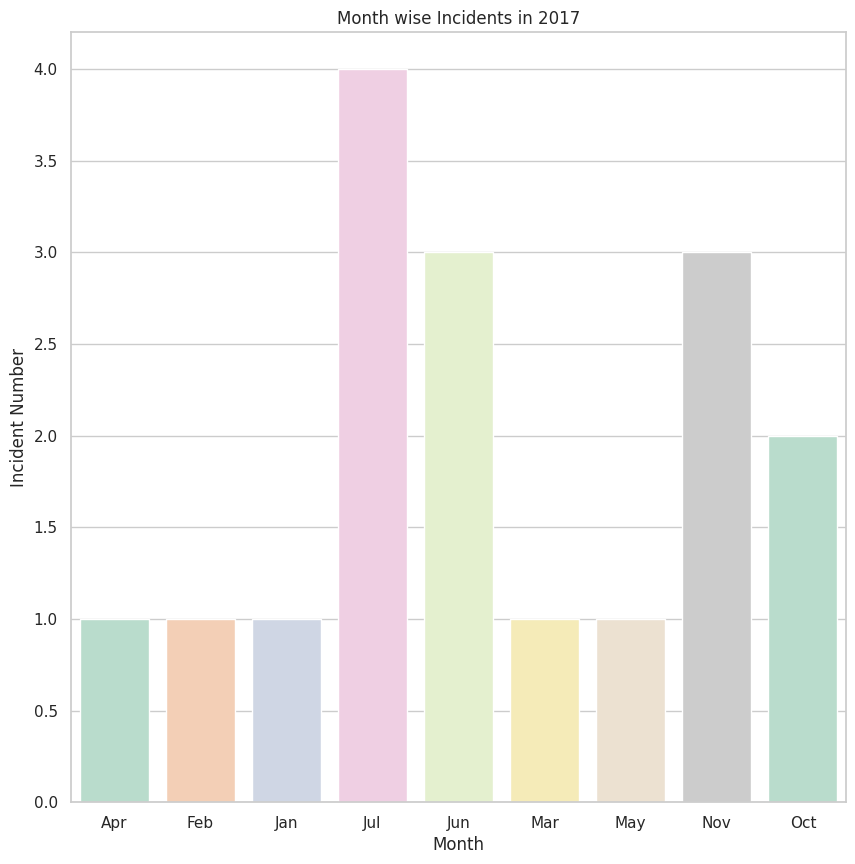

Month with maximum incidents in Year the year 2017: Jul


In [128]:
#Define the Data
months_2017 = data[data['Year'] == 2017]['Month'].reset_index(drop = True)
incidents_month_2017 = data.groupby(months_2017)['Incident Number'].count().reset_index()

#Plotting the graph
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Month', y = 'Incident Number', data = incidents_month_2017,hue = incidents_month_2017['Month'], palette = 'Pastel2')
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Month wise Incidents in 2017')
plt.show()

#Month in 2017 with maximum number of incidents
max_incidents_month_2017 = incidents_month_2017.loc[incidents_month_2017['Incident Number'].idxmax(), 'Month']
print(f"Month with maximum incidents in Year the year 2017: {max_incidents_month_2017}")

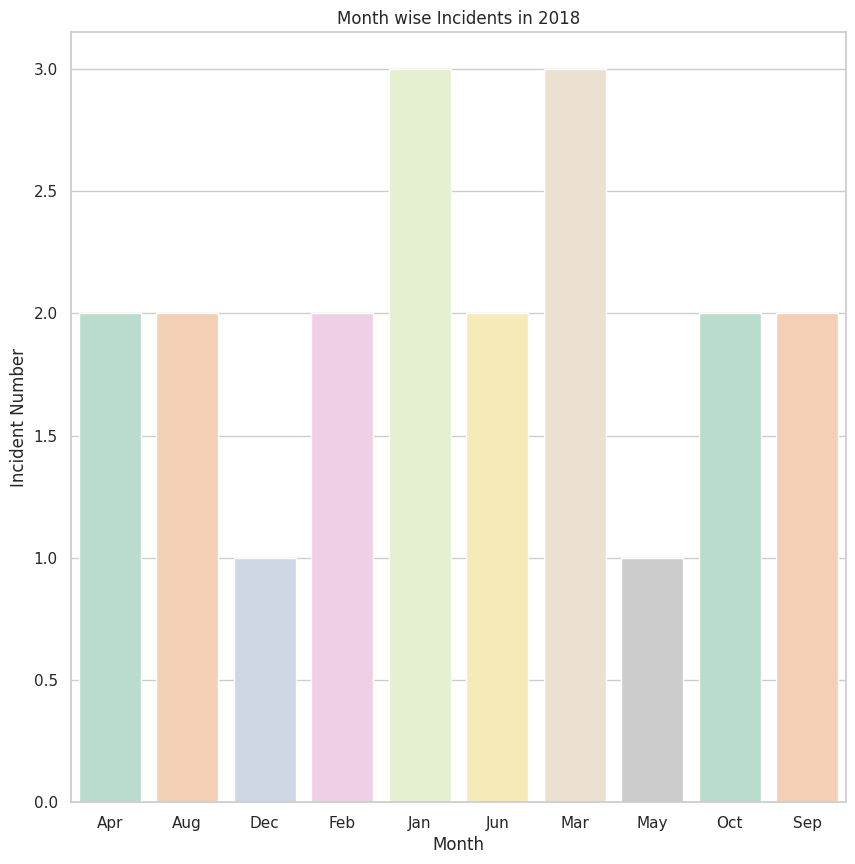

Month with maximum incidents in Year the year 2018: Jun


In [129]:
#Define the Data
months_2018 = data[data['Year'] == 2018]['Month'].reset_index(drop = True)
incidents_month_2018 = data.groupby(months_2018)['Incident Number'].count().reset_index()

#Plotting the graph
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Month', y = 'Incident Number', data = incidents_month_2018, hue = incidents_month_2018['Month'], palette = 'Pastel2')
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Month wise Incidents in 2018')
plt.show()

#Month in 2018 with maximum number of incidents
max_incidents_month_2018 = incidents_month_2017.loc[incidents_month_2018['Incident Number'].idxmax(), 'Month']
print(f"Month with maximum incidents in Year the year 2018: {max_incidents_month_2018}")

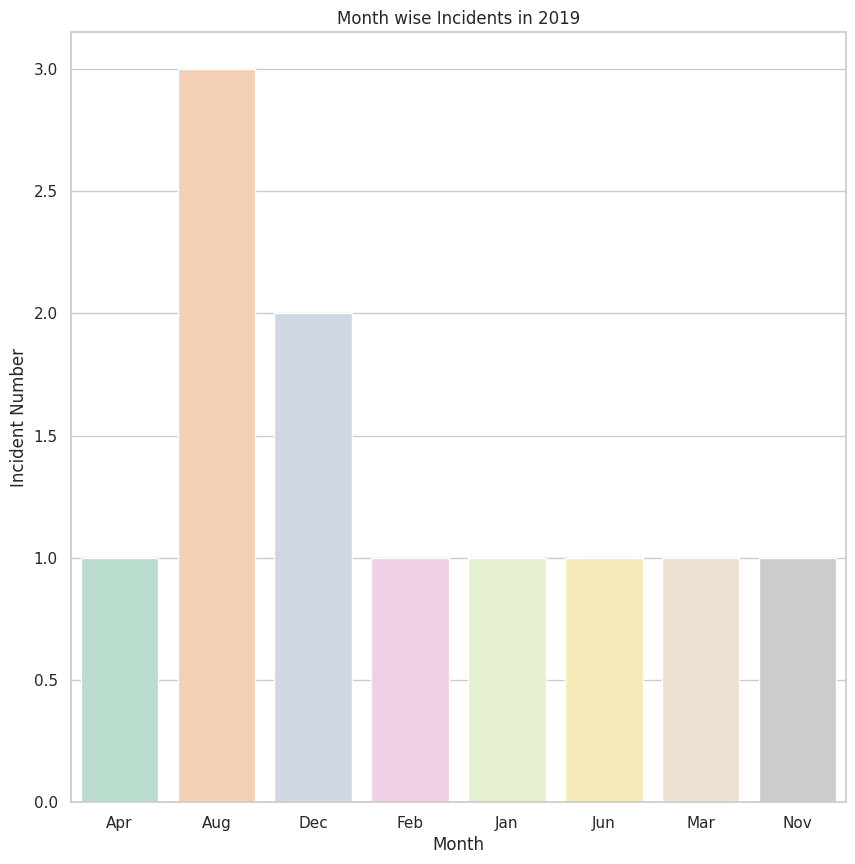

Month with maximum incidents in Year the year 2019: Aug


In [130]:
 #Define the Data
months_2019 = data[data['Year'] == 2019]['Month'].reset_index(drop = True)
incidents_month_2019 = data.groupby(months_2019)['Incident Number'].count().reset_index()

#Plotting the graph
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Month', y = 'Incident Number', data = incidents_month_2019, hue = incidents_month_2019['Month'], palette = 'Pastel2')
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Month wise Incidents in 2019')
plt.show()

#Month in 2019 with maximum number of incidents
max_incidents_month_2019 = incidents_month_2019.loc[incidents_month_2019['Incident Number'].idxmax(), 'Month']
print(f"Month with maximum incidents in Year the year 2019: {max_incidents_month_2019}")

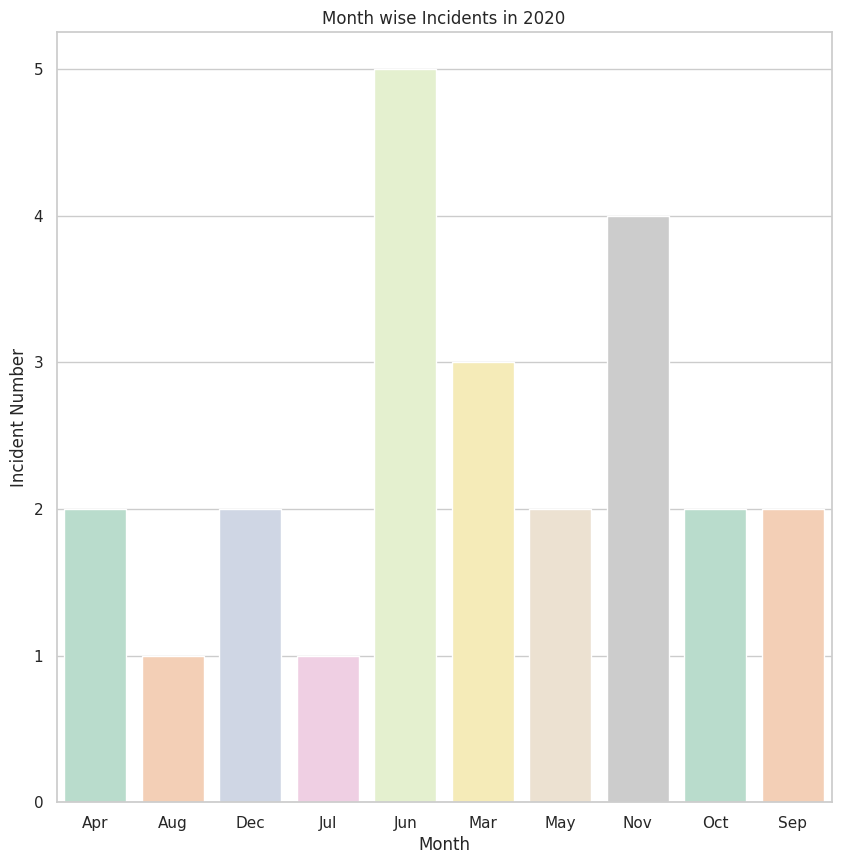

Month with maximum incidents in Year the year 2020: Jun


In [131]:
#Define the Data
months_2020 = data[data['Year'] == 2020]['Month'].reset_index(drop = True)
incidents_month_2020 = data.groupby(months_2020)['Incident Number'].count().reset_index()

#Plotting the graph
plt.figure(figsize = (10,10))
sns.barplot(x = 'Month', y = 'Incident Number', data = incidents_month_2020, hue = incidents_month_2020['Month'], palette = 'Pastel2')
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Month wise Incidents in 2020')
plt.show()

#Month in 2020 with maximum number of incidents
max_incidents_month_2020 = incidents_month_2020.loc[incidents_month_2020['Incident Number'].idxmax(), 'Month']
print(f"Month with maximum incidents in Year the year 2020: {max_incidents_month_2020}")

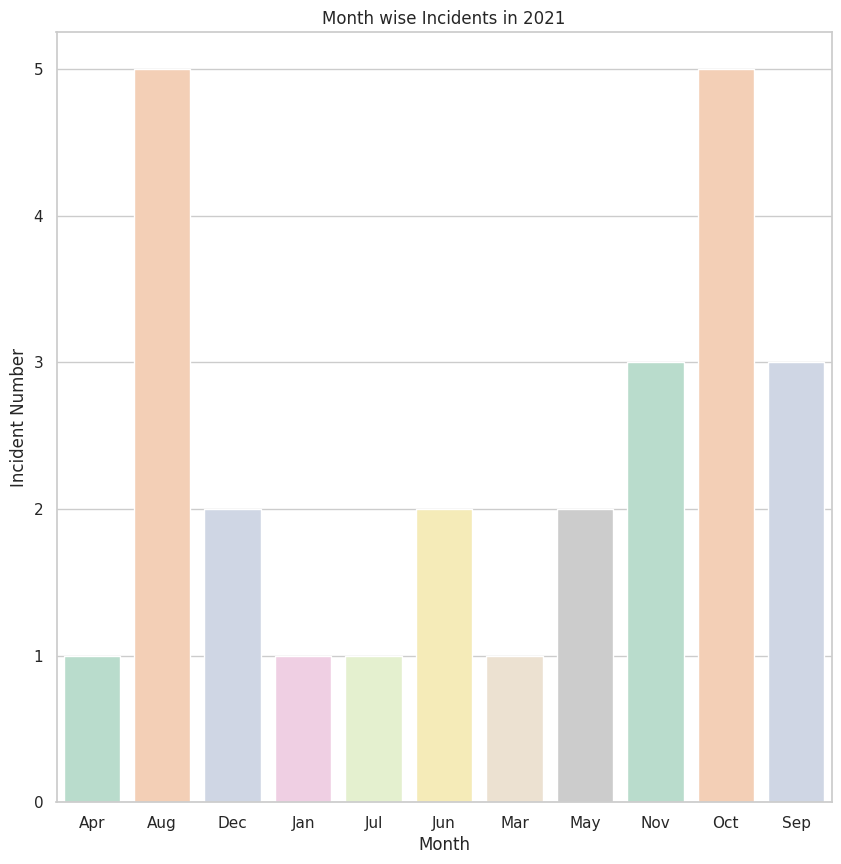

Month with maximum incidents in Year the year 2021: Aug


In [132]:
#Define the Data
months_2021 = data[data['Year'] == 2021]['Month'].reset_index(drop = True)
incidents_month_2021 = data.groupby(months_2021)['Incident Number'].count().reset_index()

#Plotting the graph
plt.figure(figsize = (10,10))
sns.barplot(x = 'Month', y = 'Incident Number', data = incidents_month_2021, hue = incidents_month_2021['Month'], palette = 'Pastel2')
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Month wise Incidents in 2021')
plt.show()

#Month in 2021 with maximum number of incidents
max_incidents_month_2021 = incidents_month_2021.loc[incidents_month_2021['Incident Number'].idxmax(), 'Month']
print(f"Month with maximum incidents in Year the year 2021: {max_incidents_month_2021}")

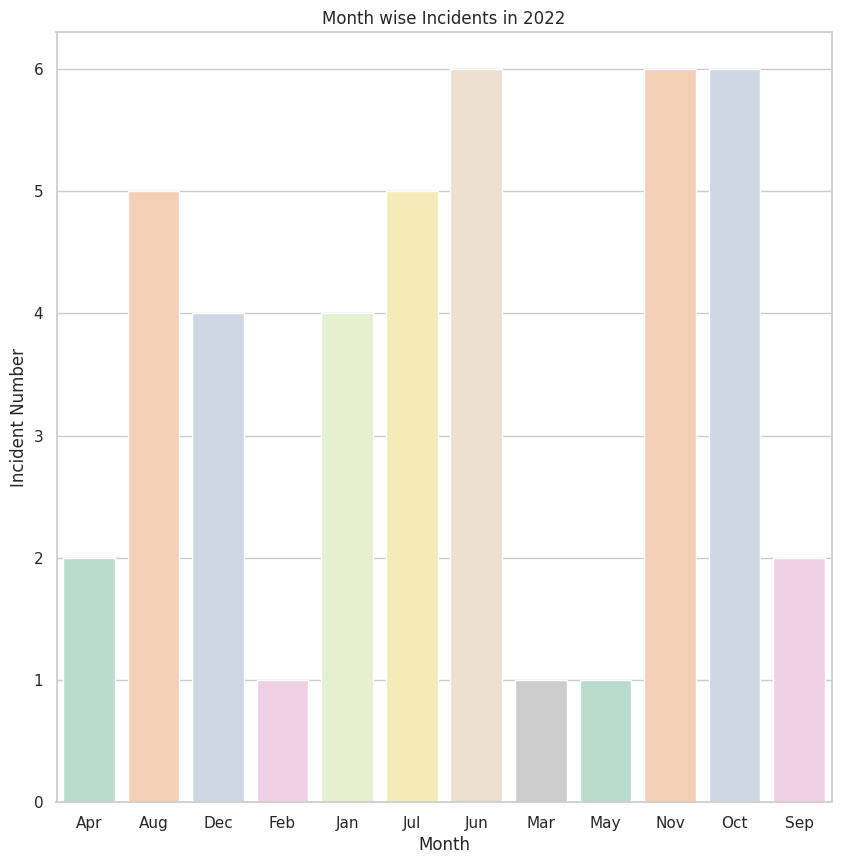

Month with maximum incidents in Year the year 2022: Jun


In [133]:
#Define the Data
months_2022 = data[data['Year'] == 2022]['Month'].reset_index(drop = True)
incidents_month_2022 = data.groupby(months_2022)['Incident Number'].count().reset_index()

#Plotting the graph
plt.figure(figsize = (10,10))
sns.barplot(x = 'Month', y = 'Incident Number', data = incidents_month_2022, hue = incidents_month_2022['Month'], palette = 'Pastel2')
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Month wise Incidents in 2022')
plt.show()

#Month in 2022 with maximum number of incidents
max_incidents_month_2022 = incidents_month_2022.loc[incidents_month_2022['Incident Number'].idxmax(), 'Month']
print(f"Month with maximum incidents in Year the year 2022: {max_incidents_month_2022}")

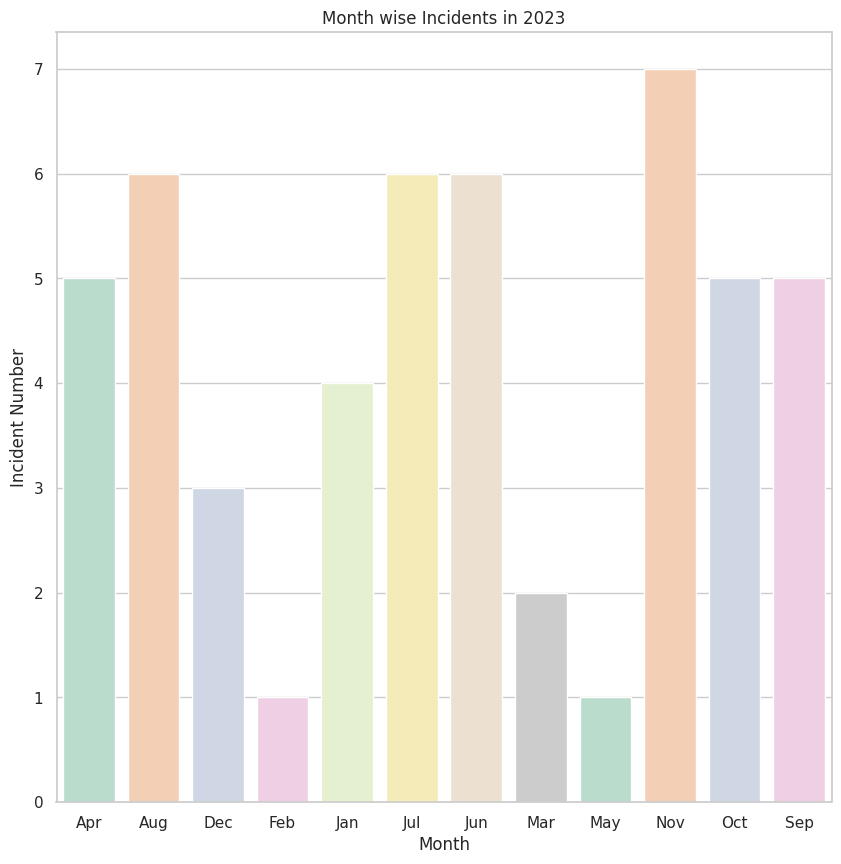

Month with maximum incidents in Year the year 2023: Nov


In [134]:
#Define the Data
months_2023 = data[data['Year'] == 2023]['Month'].reset_index(drop = True)
incidents_month_2023 = data.groupby(months_2023)['Incident Number'].count().reset_index()

#Plotting thwe graph
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Month', y = 'Incident Number', data = incidents_month_2023, hue = incidents_month_2023['Month'], palette = 'Pastel2')
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Month wise Incidents in 2023')
plt.show()

#Month in 2023 with maximum number of incidents
max_incidents_month_2023 = incidents_month_2023.loc[incidents_month_2023['Incident Number'].idxmax(), 'Month']
print(f"Month with maximum incidents in Year the year 2023: {max_incidents_month_2023}")

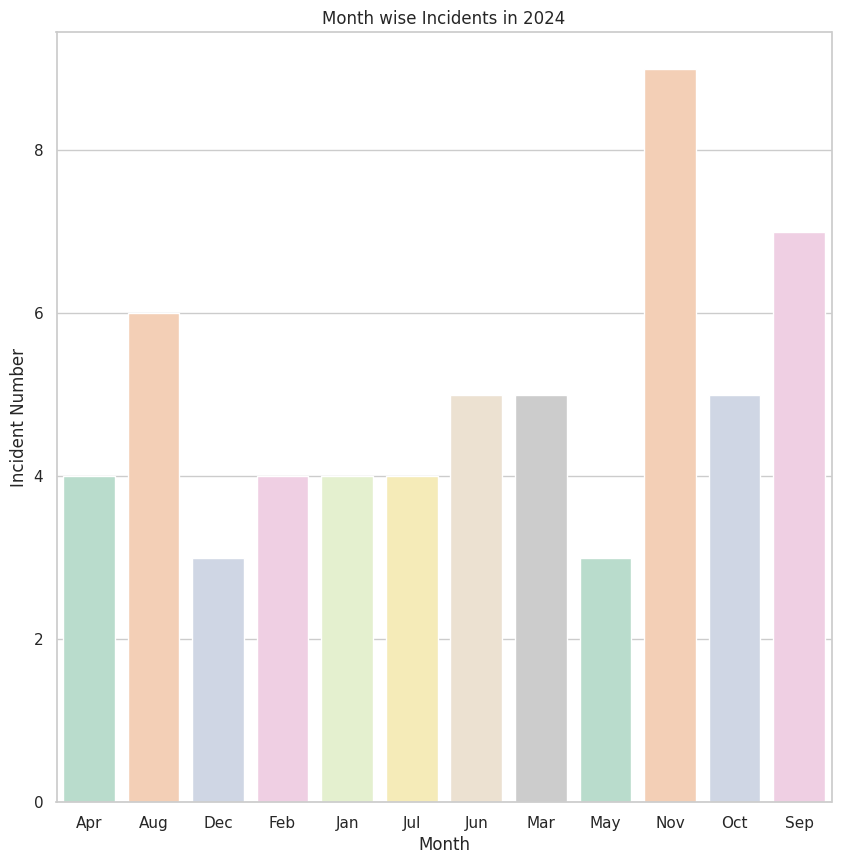

Month with maximum incidents in Year the year 2024: Nov


In [135]:
#Define the Data
months_2024 = data[data['Year'] == 2024]['Month'].reset_index(drop = True)
incidents_month_2024 = data.groupby(months_2024)['Incident Number'].count().reset_index()

#Plotting the graph
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Month', y = 'Incident Number', data = incidents_month_2024, hue = incidents_month_2024['Month'], palette = 'Pastel2')
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Month wise Incidents in 2024')
plt.show()

#Month in 2024 with maximum number of incidents
max_incidents_month_2024 = incidents_month_2024.loc[incidents_month_2024['Incident Number'].idxmax(), 'Month']
print(f"Month with maximum incidents in Year the year 2024: {max_incidents_month_2024}")

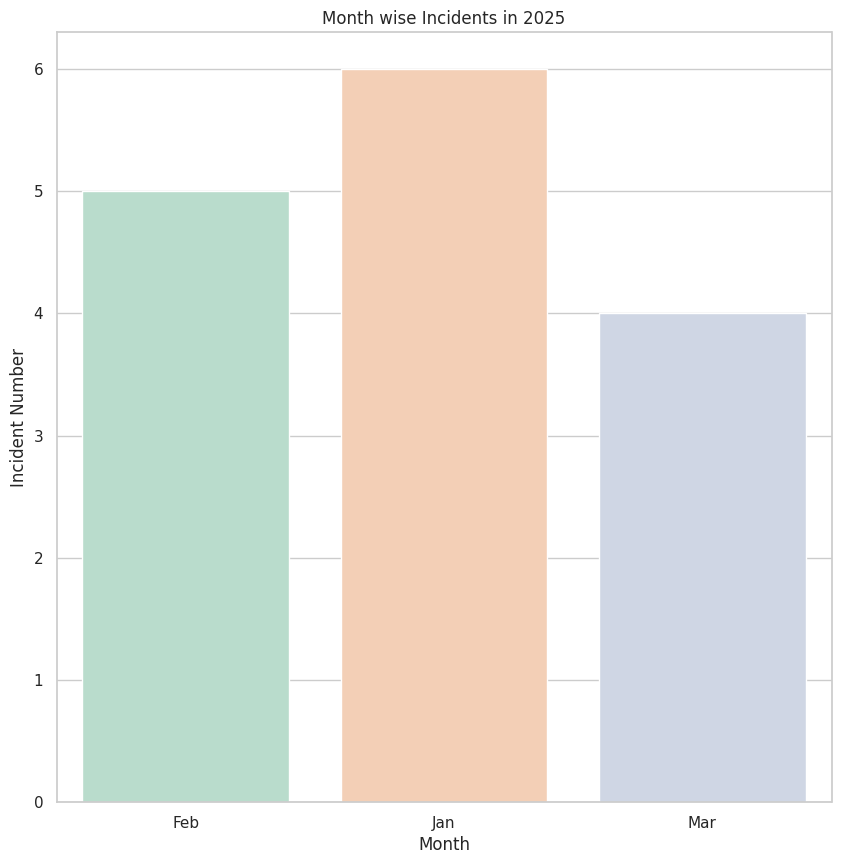

Month with maximum incidents in Year the year 2025: Jan


In [136]:
#Define the Data
months_2025 = data[data['Year'] == 2025]['Month'].reset_index(drop = True)
incidents_month_2025 = data.groupby(months_2025)['Incident Number'].count().reset_index()

#Plotting the graph
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Month', y = 'Incident Number', data = incidents_month_2025, hue = incidents_month_2025['Month'], palette = 'Pastel2')
plt.xlabel('Month')
plt.ylabel('Incident Number')
plt.title('Month wise Incidents in 2025')
plt.show()

#Month in 2025 with maximum number of incidents
max_incidents_month_2025 = incidents_month_2025.loc[incidents_month_2025['Incident Number'].idxmax(), 'Month']
print(f"Month with maximum incidents in Year the year 2025: {max_incidents_month_2025}")

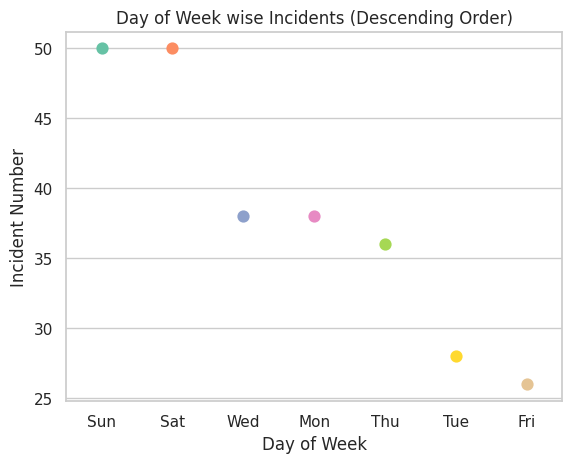

Day of Week with maximum incidents: Sun


In [137]:
#Define data
day_of_week = data['Day of Week'].value_counts().reset_index()
day_of_week.columns = ['Day of Week', 'Incident Number']

#Plotting bar graph
sns.pointplot(x = 'Day of Week', y = 'Incident Number', data = day_of_week, color = 'black', hue = day_of_week['Day of Week'], palette= 'Set2')
plt.xlabel('Day of Week')
plt.ylabel('Incident Number')
plt.title('Day of Week wise Incidents (Descending Order)')
plt.show()

#Maximum crime weekday
max_incidents_weekday = day_of_week.loc[day_of_week['Incident Number'].idxmax(), 'Day of Week']
print(f"Day of Week with maximum incidents: {max_incidents_weekday}")

Number of offenders below 18: 20
Number of victims below 18: 12


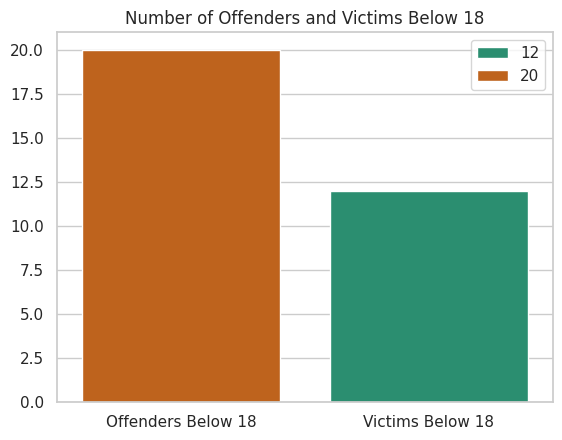

In [103]:
#Number of offenders below 18 and number of victims under 18
hue_Def_below = [offenders_below_18, victims_below_18]
offenders_below_18 = data['Number of Offenders under 18'].replace('Unknown', 0).astype(int).sum()
victims_below_18 = data['Number of Victims under 18'].replace('Unknown', 0).astype(int).sum()

print(f"Number of offenders below 18: {offenders_below_18}")
print(f"Number of victims below 18: {victims_below_18}")

sns.barplot(x = ['Offenders Below 18', 'Victims Below 18'], y = [offenders_below_18, victims_below_18], hue = hue_Def_below, palette = 'Dark2')
plt.title('Number of Offenders and Victims Below 18')
plt.show()

Number of offenders above 18: 233
Number of victims above 18: 268


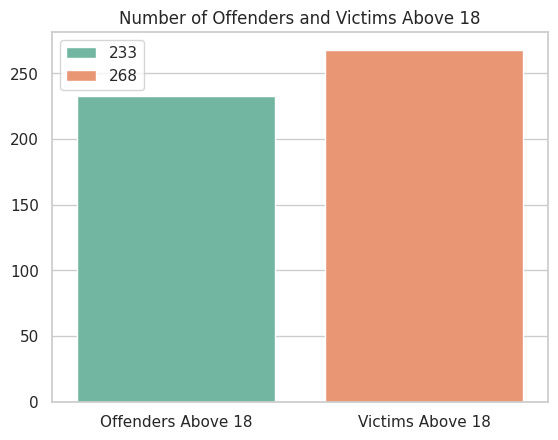

In [105]:
#Number of offenders and victims above 18 years of age
hue_Def_above = [offenders_above_18, victims_above_18]
offenders_above_18 = data['Number of Offenders over 18'].replace('Unknown', 0).fillna(0).astype(int).sum()
victims_above_18 = data['Number of Victims over 18'].replace('Unknown', 0).fillna(0).astype(int).sum()

print(f"Number of offenders above 18: {offenders_above_18}")
print(f"Number of victims above 18: {victims_above_18}")

sns.barplot(x = ['Offenders Above 18', 'Victims Above 18'], y = [offenders_above_18, victims_above_18], hue = hue_Def_above, palette = 'Set2')
plt.title('Number of Offenders and Victims Above 18')
plt.show()

70


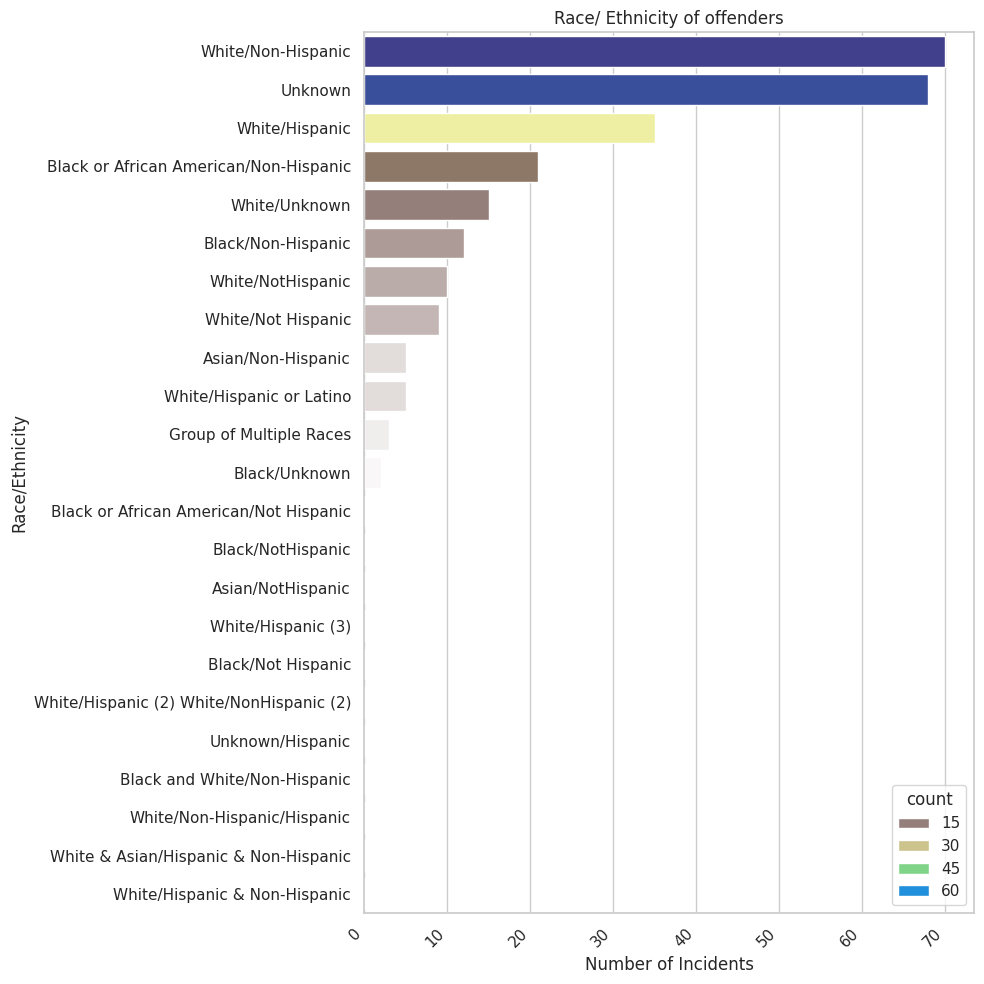

Maximum offence is caused by: White/Non-Hispanic


In [94]:
#Race and ethinicity of offenders
offenders = data['Race/Ethnicity of Offenders'].value_counts()
print(offenders.max())

plt.figure(figsize = (10, 10))
sns.barplot(x = offenders.values, y = offenders.index,hue = offenders, palette = 'terrain_r')
plt.title('Race/ Ethnicity of offenders')
plt.xlabel('Number of Incidents')
plt.ylabel('Race/Ethnicity')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

#maximum offences are caused by
max_offence = data['Race/Ethnicity of Offenders'].value_counts().idxmax()
print(f"Maximum offence is caused by: {max_offence}")

58


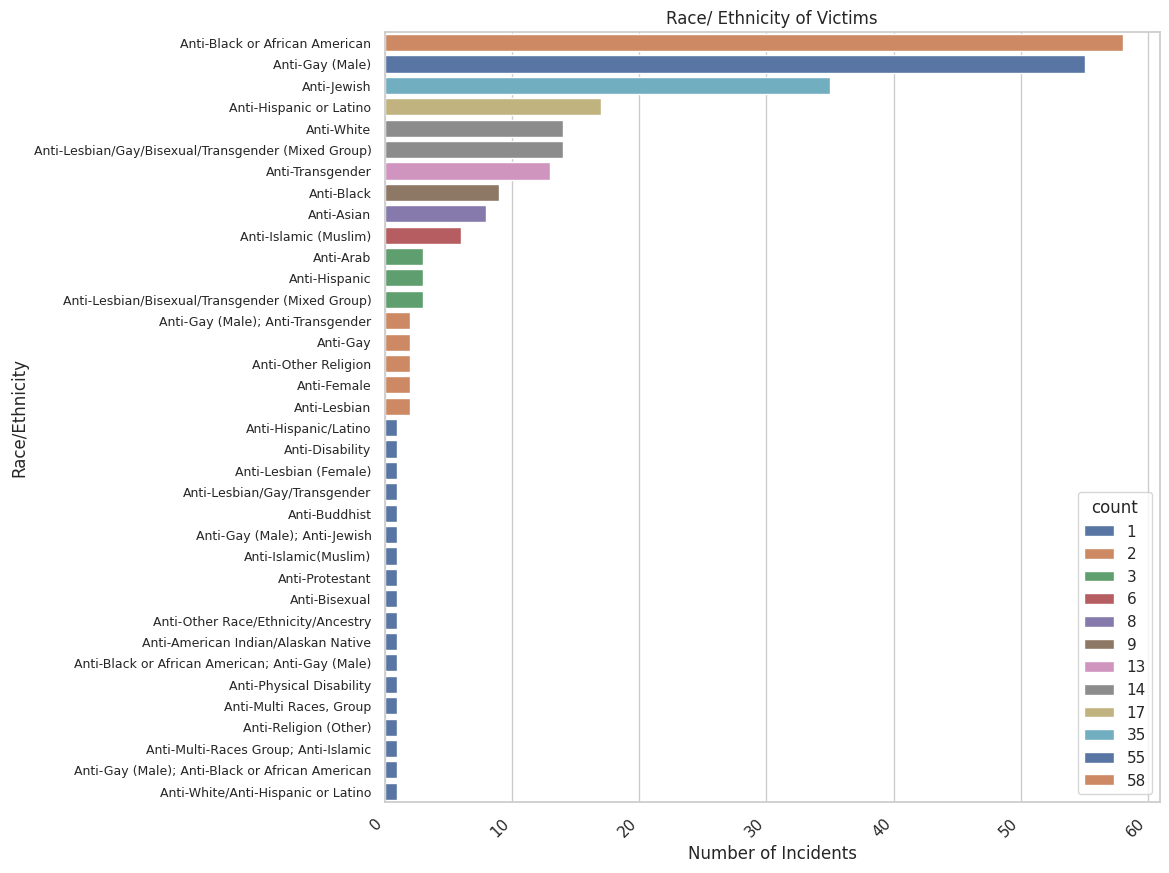

Maximum victims of maximum offences are: Anti-Black or African American


In [85]:
#Maximum offences are caused against
victims = data['Bias'].value_counts()
print(victims.max())

#Plot figure
plt.figure(figsize = (10, 10))
sns.barplot(x = victims.values, y = victims.index, hue = victims, palette = 'deep')
plt.title('Race/ Ethnicity of Victims')
plt.xlabel('Number of Incidents')
plt.ylabel('Race/Ethnicity')
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(size = 9)
plt.show()

#who are the victims
max_offence2 = data['Bias'].value_counts().idxmax()
print(f"Maximum victims of maximum offences are: {max_offence2}")

In [25]:
#Crimes
offense = data['Offense(s)']
offense.head()

,Offense(s)
0,Aggravated Assault
1,Aggravated Assault
2,Destruction
3,Simple Assault
4,Simple Assault


In [26]:
#Location of offenses
offense_loc = data['Offense Location']
offense_loc.head()

,Offense Location
0,Park/Playground
1,Highway/Road/Alley/Street/Sidewalk
2,Highway/Road/Alley/Street/Sidewalk
3,Air/Bus/Train Terminal
4,Residence/Home


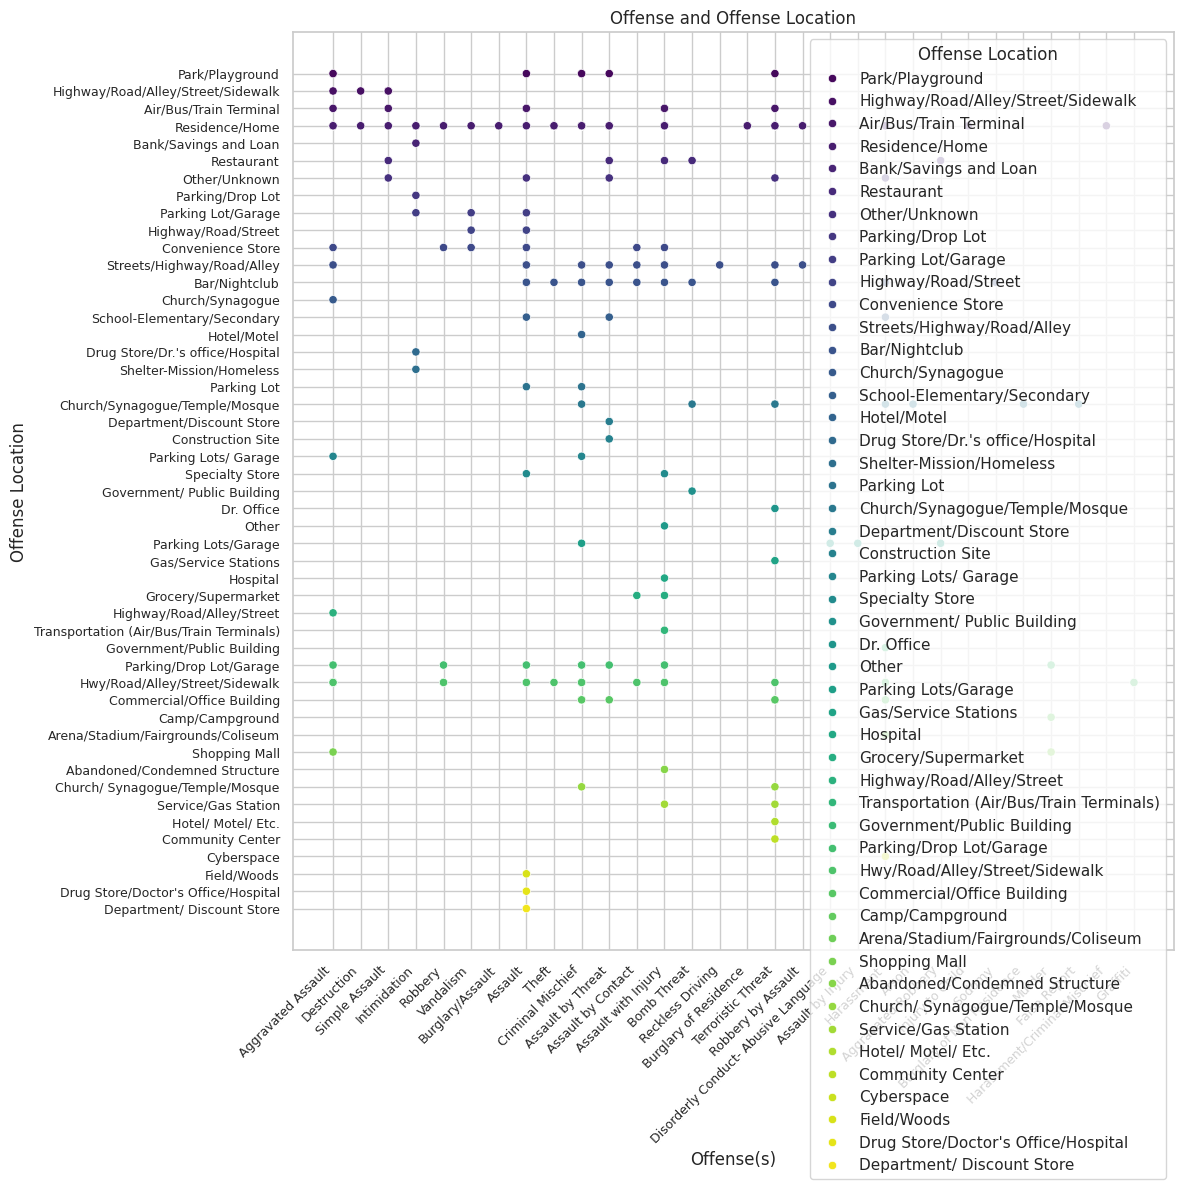

In [75]:
#plot offense and offense location
plt.figure(figsize=(12, 12))
sns.scatterplot(x = offense, y = offense_loc, hue=offense_loc, palette='viridis')
plt.xlabel('Offense(s)')
plt.ylabel('Offense Location')
plt.title('Offense and Offense Location')
plt.xticks(rotation = 45, ha = 'right', size = 9)
plt.yticks(size = 9)
plt.tight_layout()
plt.show()

In [48]:
#max offenses are in which location
max_offense_location = data['Offense Location'].value_counts().idxmax()
print(f"Maximum offenses occur in: {max_offense_location}")

Maximum offenses occur in: Residence/Home


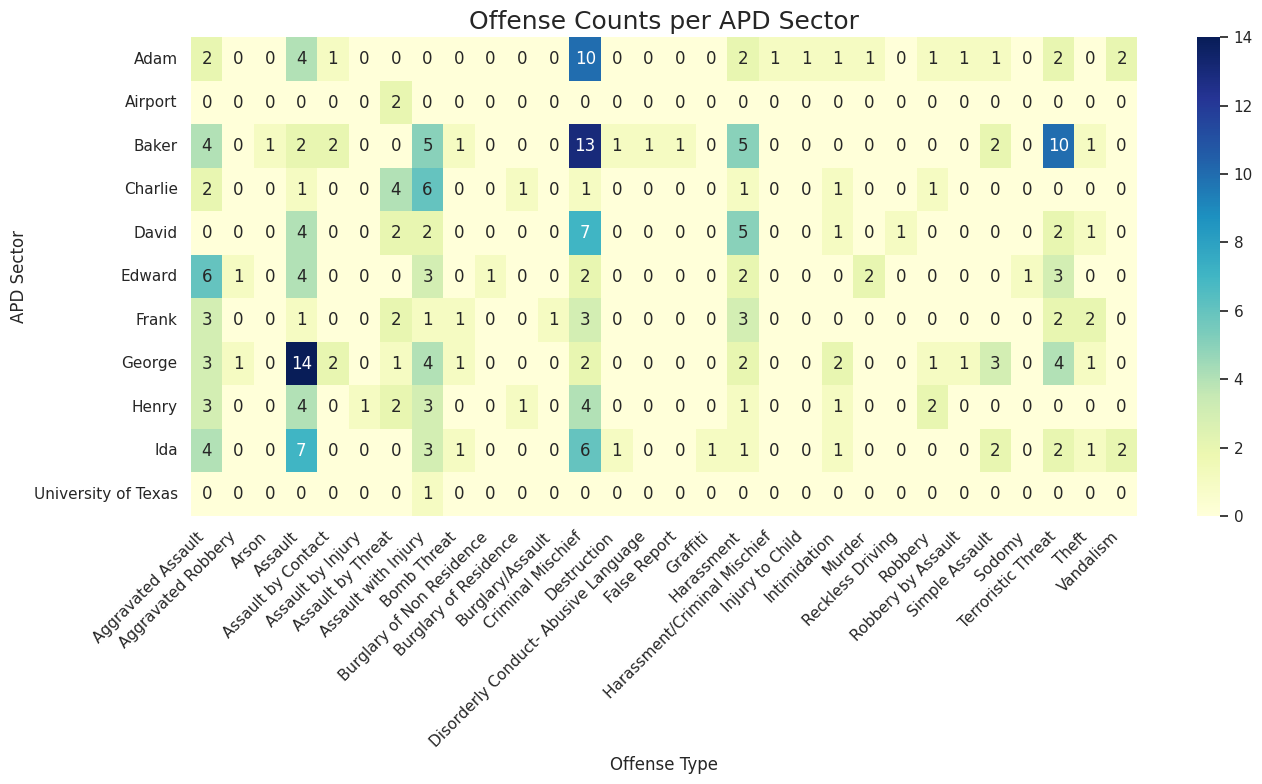

In [62]:
#ADP sectors and offenses
apd_sectors = data.groupby('APD Sector')['Offense(s)'].value_counts()
heatmap_df = apd_sectors.unstack().fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_df, annot=True, fmt='.0f', cmap='YlGnBu')

plt.title('Offense Counts per APD Sector', fontsize=18)
plt.xlabel('Offense Type')
plt.ylabel('APD Sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [73]:
#Sector wise maximum offenses
apd_sector = data.groupby('APD Sector')['Offense(s)'].value_counts().reset_index(name='count')

max_offenses_by_sector = apd_sector.loc[apd_sector.groupby('Offense(s)')['count'].idxmax()]

print(max_offenses_by_sector[['APD Sector', 'Offense(s)', 'count']])

    APD Sector                            Offense(s)  count
47      Edward                    Aggravated Assault      6
54      Edward                    Aggravated Robbery      1
23       Baker                                 Arson      1
67      George                               Assault     14
21       Baker                    Assault by Contact      2
88       Henry                     Assault by Injury      1
30     Charlie                     Assault by Threat      4
29     Charlie                   Assault with Injury      6
24       Baker                           Bomb Threat      1
55      Edward             Burglary of Non Residence      1
33     Charlie                 Burglary of Residence      1
66       Frank                      Burglary/Assault      1
15       Baker                     Criminal Mischief     13
25       Baker                           Destruction      1
26       Baker  Disorderly Conduct- Abusive Language      1
27       Baker                          

In [142]:
#tabularise max offenses data
max_offenses_by_sector = apd_sector.loc[apd_sector.groupby('Offense(s)')['count'].idxmax()]
max_offenses_by_sector

,APD Sector,Offense(s),count
47,Edward,Aggravated Assault,6
54,Edward,Aggravated Robbery,1
23,Baker,Arson,1
67,George,Assault,14
21,Baker,Assault by Contact,2
88,Henry,Assault by Injury,1
30,Charlie,Assault by Threat,4
29,Charlie,Assault with Injury,6
24,Baker,Bomb Threat,1
55,Edward,Burglary of Non Residence,1
